In [1]:
%pip install numpy pandas matplotlib tensorflow keras pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os


In [12]:
img_size = 150  # Image size (150x150 pixels)
batch_size = 32  # Number of images processed at a time

train_dir = "dataset/train/"
test_dir = "dataset/test/"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import os

train_path = "dataset/train/"
test_path = "dataset/test/"

print("Training NORMAL images:", len(os.listdir(train_path + "NORMAL/")))
print("Training PNEUMONIA images:", len(os.listdir(train_path + "PNEUMONIA/")))
print("Test NORMAL images:", len(os.listdir(test_path + "NORMAL/")))
print("Test PNEUMONIA images:", len(os.listdir(test_path + "PNEUMONIA/")))


Training NORMAL images: 6
Training PNEUMONIA images: 6
Test NORMAL images: 6
Test PNEUMONIA images: 6


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Remove validation_split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10 images belonging to 2 classes.


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6389 - val_accuracy: 0.5000 - val_loss: 2.6167
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4000 - loss: 1.6968 - val_accuracy: 0.5000 - val_loss: 1.2420
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.4000 - loss: 2.1484 - val_accuracy: 0.5000 - val_loss: 1.1037
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7000 - loss: 1.4387 - val_accuracy: 0.5000 - val_loss: 0.9694
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4000 - loss: 1.6993 - val_accuracy: 0.5000 - val_loss: 0.9895


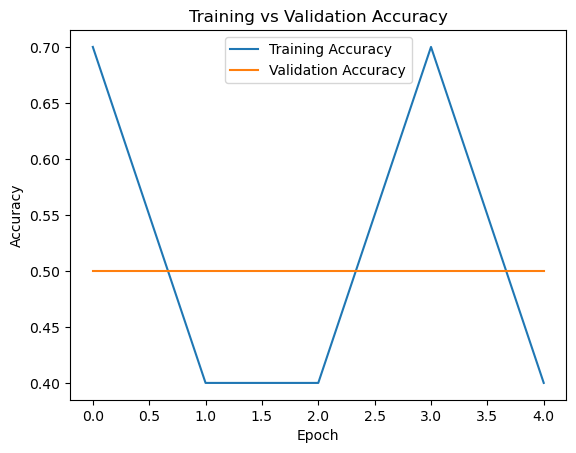

In [17]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [18]:
model.save("medical_diagnosis_model.h5")
print("Model saved successfully!")

# Load the saved model
model = tf.keras.models.load_model("medical_diagnosis_model.h5")
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!
